In [1]:
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import random

In [2]:
# read file function
def read_dic(mypath:str)-> list:
    onlyfiles = [mypath + '/'+f for f in listdir(mypath) if isfile(join(mypath, f)) and f != ".DS_Store"]
    return onlyfiles

In [ ]:
folder = read_dic('/Users/alex/Documents/GitHub/Visual-Similarity/Data/7_Maurer_inprep_followup')
image_Labels = []
for file in folder:
    # load the image
    image = Image.open(file)
    # convert image to numpy array
    data = asarray(image)
    data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
    # set thresholds to adjust ink
    for m in range(data.shape[0]):
        for n in range(data.shape[1]):
            if data[m][n] > 127.5:
                data[m][n] = 255
            else:
                data[m][n] = 0
    num_labels, labels = cv2.connectedComponents(data)
    image_Labels.append(labels)
    

In [ ]:
flat_list = [item for sublist in labels for item in sublist]
set(flat_list)
flat_list = [item for sublist in data for item in sublist]
set(flat_list)

In [ ]:
# np.savetxt("/Users/alex/Desktop/data.csv", data, delimiter=",")

In [ ]:
# list all i and j in dictionary according to labels
dic = {}
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        if labels[i][j] in dic.keys():
            dic[labels[i][j]].append((i,j))
        else:
            dic[labels[i][j]] = []
            dic[labels[i][j]].append((i,j))

In [ ]:
# define function find min&max i&j in dictionary for each key
def find_min_max_ij(dic):   
    i_s =[]
    j_s =[]
    for tup in dic:
        i_s.append(tup[0])
        j_s.append(tup[1])
    i_min,i_max = min(i_s),max(i_s)
    j_min,j_max = min(j_s),max(j_s)
    return i_min,i_max,j_min,j_max

In [ ]:
# make a dic for i&j min&max
dic_min_max= {}
for obj in dic.keys():
    i_min,i_max,j_min,j_max = find_min_max_ij(dic[obj])
    dic_min_max[obj] = [i_min,i_max,j_min,j_max]

In [ ]:
dic_min_max


In [ ]:
print(i_min)

In [ ]:
# define contain function
def contain(i_min1,i_max1,j_min1,j_max1,i_min2,i_max2,j_min2,j_max2):
    if i_min1<i_min2 and j_min1<j_min2 and i_max1>i_max2 and j_max1>j_max2:
        return True # label 1 contains label 2
    else:
        return False

In [ ]:
# find where the 0s are in original data -> 8 in 'labels'
for key in dic.keys():
    for k in range(len(dic[key])):
        if data[dic[key][k]] == 255:
            labels[dic[key][k]] = 8

In [ ]:
# generate pairwise list of labels
pair_list = []
for t in range(0,len([*dic])):
	for p in range(0,len([*dic])):
		if (t!=p):
			pair_list.append(([*dic][t],[*dic][p]))


In [ ]:
# contain function -> if some components are contained by the other, change them to the same
for pair in pair_list:
    key1 = pair[0]
    key2 = pair[1]
    if contain(dic_min_max[key1][0], dic_min_max[key1][1], dic_min_max[key1][2], dic_min_max[key1][3],
    dic_min_max[key2][0], dic_min_max[key2][1], dic_min_max[key2][2], dic_min_max[key2][3]) == True:
        for kk in range(len(dic[key1])):
            labels[dic[key1][kk]] = labels[dic[key1][kk]]

In [ ]:
plt.imshow(labels)
print(labels[52])

In [ ]:
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import random

# read file function
def read_dic(mypath:str)-> list:
    onlyfiles = [mypath + '/'+f for f in listdir(mypath) if isfile(join(mypath, f)) and f != ".DS_Store"]
    return onlyfiles

folder = read_dic('/Users/alex/Documents/GitHub/Visual-Similarity/Data/7_Maurer_inprep_followup')
image_Labels = []
for file in folder:
    # load the image
    image = Image.open(file)
    # convert image to numpy array
    data = asarray(image)
    data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
    # set thresholds to adjust ink
    for m in range(data.shape[0]):
        for n in range(data.shape[1]):
            if data[m][n] > 127.5:
                data[m][n] = 255
            else:
                data[m][n] = 0
    num_labels, labels = cv2.connectedComponents(data)
    image_Labels.append(labels)

for labels in image_Labels:
    # list all i and j in dictionary according to labels
    dic = {}
    for i in range(labels.shape[0]):
        for j in range(labels.shape[1]):
            if labels[i][j] in dic.keys():
                dic[labels[i][j]].append((i,j))
            else:
                dic[labels[i][j]] = []
                dic[labels[i][j]].append((i,j))

    # define function find min&max i&j in dictionary for each key
    def find_min_max_ij(dic):   
        i_s =[]
        j_s =[]
        for tup in dic:
            i_s.append(tup[0])
            j_s.append(tup[1])
        i_min,i_max = min(i_s),max(i_s)
        j_min,j_max = min(j_s),max(j_s)
        return i_min,i_max,j_min,j_max

    # make a dic for i&j min&max
    dic_min_max= {}
    for obj in dic.keys():
        i_min,i_max,j_min,j_max = find_min_max_ij(dic[obj])
        dic_min_max[obj] = [i_min,i_max,j_min,j_max]

    # define contain function
    def contain(i_min1,i_max1,j_min1,j_max1,i_min2,i_max2,j_min2,j_max2):
        if i_min1<i_min2 and j_min1<j_min2 and i_max1>i_max2 and j_max1>j_max2:
            return True # label 1 contains label 2
        else:
            return False

    # find where the 0s are in original data -> 8 in 'labels'
    for key in dic.keys():
        for k in range(len(dic[key])):
            if data[dic[key][k]] == 255:
                labels[dic[key][k]] = 8

    # generate pairwise list of labels
    pair_list = []
    for t in range(0,len([*dic])):
        for p in range(0,len([*dic])):
            if (t!=p):
                pair_list.append(([*dic][t],[*dic][p]))

    # contain function -> if some components are contained by the other, change them to the same
    for pair in pair_list:
        key1 = pair[0]
        key2 = pair[1]
        if contain(dic_min_max[key1][0], dic_min_max[key1][1], dic_min_max[key1][2], dic_min_max[key1][3],
        dic_min_max[key2][0], dic_min_max[key2][1], dic_min_max[key2][2], dic_min_max[key2][3]) == True:
            for kk in range(len(dic[key1])):
                labels[dic[key1][kk]] = labels[dic[key1][kk]]


In [ ]:
set(flat_list)

In [ ]:
dic

In [209]:
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import random
from PIL import Image
import json

# read file function
def read_dic(mypath:str)-> list:
    onlyfiles = [mypath + '/'+f for f in listdir(mypath) if isfile(join(mypath, f)) and f != ".DS_Store"]
    return onlyfiles
def find_min_max_ij(dic):   
    i_s =[]
    j_s =[]
    for tup in dic:
        i_s.append(tup[0])
        j_s.append(tup[1])
    i_min,i_max = min(i_s),max(i_s)
    j_min,j_max = min(j_s),max(j_s)
    return i_min,i_max,j_min,j_max
# define contain function
def contain(i_min1,i_max1,j_min1,j_max1,i_min2,i_max2,j_min2,j_max2):
    if i_min1<i_min2 and j_min1<j_min2 and i_max1>i_max2 and j_max1>j_max2:
        return True # label 1 contains label 2
    else:
        return False

def flat_list(listt):
    flat_list = [item for sublist in listt for item in sublist]
    return set(flat_list)


f = open ('words_stroks8.json', "r")
total_strokes = json.load(f)
with open('Chi_8.txt') as f:
    lines = f.readlines()
a = lines[0].split(' ')

folder = read_dic('Data/8_Maurer_inprep_repsup')
contain_obj = {}
image_Labels = []
data_list = []
image_stats = []
ims= []

for file in folder:
    
    image_stat = []
    # load the image
#     image = Image.open(file)
    # convert image to numpy array
    img = cv2.imread(file, 0)
#     plt.imshow(data)
#     data = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 127, 0, cv2.THRESH_BINARY)[1]
    
    # set thresholds
#     for m in range(data.shape[0]):
#         for n in range(data.shape[1]):
#             if data[m][n] > 127.5:
#                 data[m][n] = 0
#             else:
#                 data[m][n] = 1
    data_list.append(img)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=8, ltype=None)
    
    background = 100
    ind = []
    flag = 0
    for stat in stats:
        count = 1
        allt = 1
        if stat[4] == 13827:
            flag +=1
            pass
#         if 1 != 2:
#             pass
        else:
            for i in range(stat[0],stat[2]):
                for j in range(stat[1],stat[3]):
                    allt +=1 
                    if data[i][j] == 0:
                        count += 1
#         print(count/allt)
        if count/allt > 0.99:
            ind.append(flag)
            image_stat.append(stat)
        flag +=1 
#     print(file,ind)
    image_stats.append(image_stat)
#     算contain
    length = len(image_stat)
    count = 0
    foo = image_stat
#     bar = []
    for i in range(len(image_stat)):
        for j in range(i + 1, len(image_stat)):
            
            i_min1, j_min1 = image_stat[i][0], image_stat[i][1]
            i_max1, j_max1 = image_stat[i][0]+image_stat[i][2], image_stat[i][1]+image_stat[i][3]
            i_min2, j_min2 = image_stat[j][0], image_stat[j][1]
            i_max2, j_max2 = image_stat[j][0]+image_stat[j][2], image_stat[j][1]+image_stat[j][3]
            
#             if contain(i_min1,i_max1,j_min1,j_max1,i_min2,i_max2,j_min2,j_max2):
#                 count +=1 
#                 if [i_min1,i_max1,j_min1,j_max1] not in foo:
#                     foo.append([i_min1,i_max1,j_min1,j_max1])
#             elif [i_min1,i_max1,j_min1,j_max1] not in foo and [i_min2,i_max2,j_min2,j_max2] not in foo:
#                 foo.append([i_min1,i_max1,j_min1,j_max1])
#                 foo.append([i_min2,i_max2,j_min2,j_max2])
#             else:
#                 pass
    
            if contain(i_min1,i_max1,j_min1,j_max1,i_min2,i_max2,j_min2,j_max2):
                count +=1 
                try:
                    foo.remove(image_stat[j])
                except:
                    pass
    
    
            
#     print(file.split('/')[-1],'number of obj: ',length - count,'number of contain', count)
    contain_obj[file] = ['number of obj: '+ str(length - count), 'number of contain: '+ str(count)]
    
    im = []
#     print(len(foo))
#     for fo in range(len(foo)):
#         i_min1, j_min1 = foo[fo][0], foo[fo][1]
#         i_max1, j_max1 = foo[fo][0]+foo[fo][2], foo[fo][1]+foo[fo][3]

#         im1 = data[i_min1:i_max1,j_min1:j_max1]
#         im.append(im1)
        
#         plt.imsave('7/'+file.split('/')[-1].split('.')[-2]+'_'+str(fo)+'.png', im1)
   



dic_pic_stroke = {}

loc = 'Data/8_Maurer_inprep_repsup_crop'
for i in range(1,61):
    
    c_loc_picH = loc + '/'+ 'CSH'+str(i)+'.png'
    c_loc_picL = loc + '/'+ 'CSL'+str(i)+'.png'
    k_loc_picH = loc + '/'+ 'KSH'+str(i)+'.png'
    k_loc_picL = loc + '/'+ 'KSL'+str(i)+'.png'
    dic_pic_stroke[c_loc_picH] = (a[i-1],total_strokes[a[i-1]])
    dic_pic_stroke[c_loc_picL] = (a[59+i],total_strokes[a[59+i]])
    dic_pic_stroke[k_loc_picH] = (a[119+i],'none')
    dic_pic_stroke[k_loc_picL] = (a[179+i],'none')  
        
    
for key in contain_obj.keys():
    contain_obj[key].insert(0,dic_pic_stroke[key][1])
    contain_obj[key].insert(0,dic_pic_stroke[key][0])  
    
contain_obj


{'Data/8_Maurer_inprep_repsup_crop/KSL58.png': ['훌',
  'none',
  'number of obj: 0',
  'number of contain: 0'],
 'Data/8_Maurer_inprep_repsup_crop/KSH1.png': ['희',
  'none',
  'number of obj: 0',
  'number of contain: 0'],
 'Data/8_Maurer_inprep_repsup_crop/KSH60.png': ['량',
  'none',
  'number of obj: 0',
  'number of contain: 0'],
 'Data/8_Maurer_inprep_repsup_crop/KSH48.png': ['空',
  'none',
  'number of obj: 0',
  'number of contain: 0'],
 'Data/8_Maurer_inprep_repsup_crop/KSH49.png': ['잘',
  'none',
  'number of obj: 0',
  'number of contain: 0'],
 'Data/8_Maurer_inprep_repsup_crop/KSL59.png': ['줍',
  'none',
  'number of obj: 0',
  'number of contain: 0'],
 'Data/8_Maurer_inprep_repsup_crop/KSH2.png': ['대',
  'none',
  'number of obj: 0',
  'number of contain: 0'],
 'Data/8_Maurer_inprep_repsup_crop/CSH59.png': ['还',
  11,
  'number of obj: 0',
  'number of contain: 0'],
 'Data/8_Maurer_inprep_repsup_crop/CSL49.png': ['泛',
  9,
  'number of obj: 0',
  'number of contain: 0'],
 'D

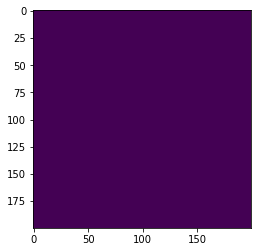

In [210]:
plt.imshow(labels)

In [241]:
file1 = 'Data/7_Maurer_inprep_followup/k24.png'
file2 = 'Data/8_Maurer_inprep_repsup_crop/KSL41.png'


In [236]:
type(image)

PIL.PngImagePlugin.PngImageFile

In [243]:


image = Image.open(file2)

# convert image to numpy array
data = asarray(image, dtype="uint8")

# data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
# # set thresholds
# for m in range(data.shape[0]):
#     for n in range(data.shape[1]):
#         if data[m][n] > 127.5:
#             data[m][n] = 0
#         else:
#             data[m][n] = 1
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(data, connectivity=8, ltype=None)
       

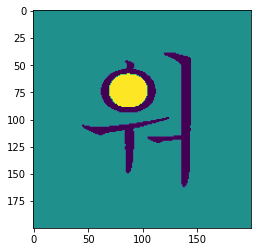

In [244]:
plt.imshow(labels)

In [175]:
import pandas as pd

df=pd.DataFrame.from_dict(contain_obj,orient='index')
df.to_excel("7_count_obj.xlsx")

'這'

In [123]:
import json
f = open ('words_stroks7.json', "r")
total_strokes = json.load(f)


4

In [140]:
for key in contain_obj.keys():
    contain_obj[key].insert(0,dic[key][1])
    contain_obj[key].insert(0,dic[key][0])

In [141]:
contain_obj

{'Data/7_Maurer_inprep_followup/c33.png': ['number of obj: 2',
  10,
  'number of contain: 0'],
 'Data/7_Maurer_inprep_followup/c27.png': ['number of obj: 4',
  9,
  'number of contain: 0'],
 'Data/7_Maurer_inprep_followup/c8.png': ['number of obj: 3',
  6,
  'number of contain: 0'],
 'Data/7_Maurer_inprep_followup/k12.png': ['number of obj: 3',
  'none',
  'number of contain: 0'],
 'Data/7_Maurer_inprep_followup/k13.png': ['number of obj: 4',
  'none',
  'number of contain: 0'],
 'Data/7_Maurer_inprep_followup/c9.png': ['number of obj: 1',
  6,
  'number of contain: 1'],
 'Data/7_Maurer_inprep_followup/c26.png': ['number of obj: 4',
  10,
  'number of contain: 0'],
 'Data/7_Maurer_inprep_followup/c32.png': ['number of obj: 4',
  10,
  'number of contain: 0'],
 'Data/7_Maurer_inprep_followup/c24.png': ['number of obj: 1',
  8,
  'number of contain: 0'],
 'Data/7_Maurer_inprep_followup/c30.png': ['number of obj: 2',
  9,
  'number of contain: 0'],
 'Data/7_Maurer_inprep_followup/c18.png

In [192]:
loc = 'Data/8_Maurer_inprep_repsup_crop/CSL53.png'
img = cv2.imread(loc, 0)
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
num_labels, labels = cv2.connectedComponents(img)


{0, 1, 2}

In [134]:
dic = {}
loc = 'Data/7_Maurer_inprep_followup'
for i in range(1,41):
    c_loc_pic = loc + '/'+ 'c'+str(i)+'.png'
    k_loc_pic = loc + '/'+ 'k'+str(i)+'.png'
    dic[c_loc_pic] = (a[i-1],total_strokes[a[i-1]])
    dic[k_loc_pic] = (a[40+i-1],'none')
dic

{'Data/7_Maurer_inprep_followup/c1.png': ('日', 4),
 'Data/7_Maurer_inprep_followup/k1.png': ('수', 'none'),
 'Data/7_Maurer_inprep_followup/c2.png': ('不', 4),
 'Data/7_Maurer_inprep_followup/k2.png': ('서', 'none'),
 'Data/7_Maurer_inprep_followup/c3.png': ('心', 4),
 'Data/7_Maurer_inprep_followup/k3.png': ('다', 'none'),
 'Data/7_Maurer_inprep_followup/c4.png': ('天', 4),
 'Data/7_Maurer_inprep_followup/k4.png': ('교', 'none'),
 'Data/7_Maurer_inprep_followup/c5.png': ('四', 5),
 'Data/7_Maurer_inprep_followup/k5.png': ('하', 'none'),
 'Data/7_Maurer_inprep_followup/c6.png': ('去', 5),
 'Data/7_Maurer_inprep_followup/k6.png': ('보', 'none'),
 'Data/7_Maurer_inprep_followup/c7.png': ('外', 5),
 'Data/7_Maurer_inprep_followup/k7.png': ('같', 'none'),
 'Data/7_Maurer_inprep_followup/c8.png': ('回', 6),
 'Data/7_Maurer_inprep_followup/k8.png': ('대', 'none'),
 'Data/7_Maurer_inprep_followup/c9.png': ('吃', 6),
 'Data/7_Maurer_inprep_followup/k9.png': ('회', 'none'),
 'Data/7_Maurer_inprep_followup/c10.p

In [55]:
[1,2,3] in [[1,2,3]]

True

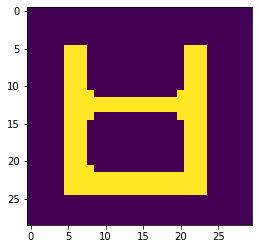

In [45]:
plt.imshow(ims[20][1])

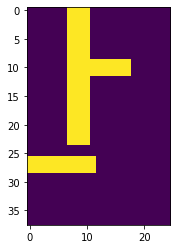

In [46]:
plt.imshow(ims[20][2])